# Lab 12 - Variable Selection
## Lecture 

In [1]:
library('MASS')
library('leaps')

Warning message:
"package 'leaps' was built under R version 4.0.4"


In [2]:
data(mtcars)

In [3]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [4]:
?mtcars

mtcars                package:datasets                 R Documentation

_M_o_t_o_r _T_r_e_n_d _C_a_r _R_o_a_d _T_e_s_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     The data was extracted from the 1974 _Motor Trend_ US magazine,
     and comprises fuel consumption and 10 aspects of automobile design
     and performance for 32 automobiles (1973-74 models).

_U_s_a_g_e:

     mtcars
     
_F_o_r_m_a_t:

     A data frame with 32 observations on 11 (numeric) variables.

       [, 1]  mpg   Miles/(US) gallon                        
       [, 2]  cyl   Number of cylinders                      
       [, 3]  disp  Displacement (cu.in.)                    
       [, 4]  hp    Gross horsepower                         
       [, 5]  drat  Rear axle ratio                          
       [, 6]  wt    Weight (1000 lbs)                        
       [, 7]  qsec  1/4 mile time                            
       [, 8]  vs    Engine (0 = V-shaped, 1 = straight)      
       [, 9]  am    Transmission (0 = automatic, 1 = manual) 
       [,10]  gear  Number of forward gears                  
       [,11]  carb  Number of carburetors                    
      
_N_o_t_e:

     Henderson and Velleman (1981) comment in a footnote to Table 1:
     'Hocking [original transcriber]'s noncrucial coding of the Mazda's
     rotary engine as a straight six-cylinder engine and the Porsche's
     flat engine as a V engine, as well as the inclusion of the diesel
     Mercedes 240D, have been retained to enable direct comparisons to
     be made with previous analyses.'

_S_o_u_r_c_e:

     Henderson and Velleman (1981), Building multiple regression models
     interactively.  _Biometrics_, *37*, 391-411.

_E_x_a_m_p_l_e_s:

     require(graphics)
     pairs(mtcars, main = "mtcars data", gap = 1/4)
     coplot(mpg ~ disp | as.factor(cyl), data = mtcars,
            panel = panel.smooth, rows = 1)
     ## possibly more meaningful, e.g., for summary() or bivariate plots:
     mtcars2 <- within(mtcars, {
        vs <- factor(vs, labels = c("V", "S"))
        am <- factor(am, labels = c("automatic", "manual"))
        cyl  <- ordered(cyl)
        gear <- ordered(gear)
        carb <- ordered(carb)
     })
     summary(mtcars2)

In [5]:
?regsubsets

regsubsets {leaps},R Documentation
x,"design matrix or model formula for full model, or biglm object"
data,Optional data frame
y,response vector
weights,weight vector
nbest,number of subsets of each size to record
nvmax,maximum size of subsets to examine
force.in,index to columns of design matrix that should be in all models
force.out,index to columns of design matrix that should be in no models
intercept,Add an intercept?
method,"Use exhaustive search, forward selection, backward selection or sequential replacement to search."


In [6]:
dim(mtcars)

[1] 32 11

In [7]:
ss_mods = regsubsets(mpg~.,data=mtcars,method="forward",nvmax=10)

In [8]:
summary(ss_mods)

Subset selection object
Call: regsubsets.formula(mpg ~ ., data = mtcars, method = "forward", 
    nvmax = 10)
10 Variables  (and intercept)
     Forced in Forced out
cyl      FALSE      FALSE
disp     FALSE      FALSE
hp       FALSE      FALSE
drat     FALSE      FALSE
wt       FALSE      FALSE
qsec     FALSE      FALSE
vs       FALSE      FALSE
am       FALSE      FALSE
gear     FALSE      FALSE
carb     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          cyl disp hp  drat wt  qsec vs  am  gear carb
1  ( 1 )  " " " "  " " " "  "*" " "  " " " " " "  " " 
2  ( 1 )  "*" " "  " " " "  "*" " "  " " " " " "  " " 
3  ( 1 )  "*" " "  "*" " "  "*" " "  " " " " " "  " " 
4  ( 1 )  "*" " "  "*" " "  "*" " "  " " "*" " "  " " 
5  ( 1 )  "*" " "  "*" " "  "*" "*"  " " "*" " "  " " 
6  ( 1 )  "*" "*"  "*" " "  "*" "*"  " " "*" " "  " " 
7  ( 1 )  "*" "*"  "*" "*"  "*" "*"  " " "*" " "  " " 
8  ( 1 )  "*" "*"  "*" "*"  "*" "*"  " " "*" "*"  " " 
9  ( 1 )  "*" "*" 

In [9]:
ss_mods = regsubsets(mpg~.,data=mtcars,method="backward",nvmax=10)

In [10]:
summary(ss_mods)

Subset selection object
Call: regsubsets.formula(mpg ~ ., data = mtcars, method = "backward", 
    nvmax = 10)
10 Variables  (and intercept)
     Forced in Forced out
cyl      FALSE      FALSE
disp     FALSE      FALSE
hp       FALSE      FALSE
drat     FALSE      FALSE
wt       FALSE      FALSE
qsec     FALSE      FALSE
vs       FALSE      FALSE
am       FALSE      FALSE
gear     FALSE      FALSE
carb     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          cyl disp hp  drat wt  qsec vs  am  gear carb
1  ( 1 )  " " " "  " " " "  "*" " "  " " " " " "  " " 
2  ( 1 )  " " " "  " " " "  "*" "*"  " " " " " "  " " 
3  ( 1 )  " " " "  " " " "  "*" "*"  " " "*" " "  " " 
4  ( 1 )  " " " "  "*" " "  "*" "*"  " " "*" " "  " " 
5  ( 1 )  " " "*"  "*" " "  "*" "*"  " " "*" " "  " " 
6  ( 1 )  " " "*"  "*" "*"  "*" "*"  " " "*" " "  " " 
7  ( 1 )  " " "*"  "*" "*"  "*" "*"  " " "*" "*"  " " 
8  ( 1 )  " " "*"  "*" "*"  "*" "*"  " " "*" "*"  "*" 
9  ( 1 )  " " "*

In [11]:
ss_mods = regsubsets(mpg~.,data=mtcars,method="exhaustive",nvmax=10)

In [12]:
summary(ss_mods)

Subset selection object
Call: regsubsets.formula(mpg ~ ., data = mtcars, method = "exhaustive", 
    nvmax = 10)
10 Variables  (and intercept)
     Forced in Forced out
cyl      FALSE      FALSE
disp     FALSE      FALSE
hp       FALSE      FALSE
drat     FALSE      FALSE
wt       FALSE      FALSE
qsec     FALSE      FALSE
vs       FALSE      FALSE
am       FALSE      FALSE
gear     FALSE      FALSE
carb     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          cyl disp hp  drat wt  qsec vs  am  gear carb
1  ( 1 )  " " " "  " " " "  "*" " "  " " " " " "  " " 
2  ( 1 )  "*" " "  " " " "  "*" " "  " " " " " "  " " 
3  ( 1 )  " " " "  " " " "  "*" "*"  " " "*" " "  " " 
4  ( 1 )  " " " "  "*" " "  "*" "*"  " " "*" " "  " " 
5  ( 1 )  " " "*"  "*" " "  "*" "*"  " " "*" " "  " " 
6  ( 1 )  " " "*"  "*" "*"  "*" "*"  " " "*" " "  " " 
7  ( 1 )  " " "*"  "*" "*"  "*" "*"  " " "*" "*"  " " 
8  ( 1 )  " " "*"  "*" "*"  "*" "*"  " " "*" "*"  "*" 
9  ( 1 )  " 

In [13]:
smry = summary(ss_mods)

In [14]:
names(smry)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [15]:
smry$which

,(Intercept),cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
1,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE
4,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE
5,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE
6,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE
7,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE
8,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE
9,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
10,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


In [16]:
smry$rsq

[1] 0.7528328 0.8302274 0.8496636 0.8578510 0.8637377 0.8667078 0.8680976
 [8] 0.8687064 0.8689448 0.8690158

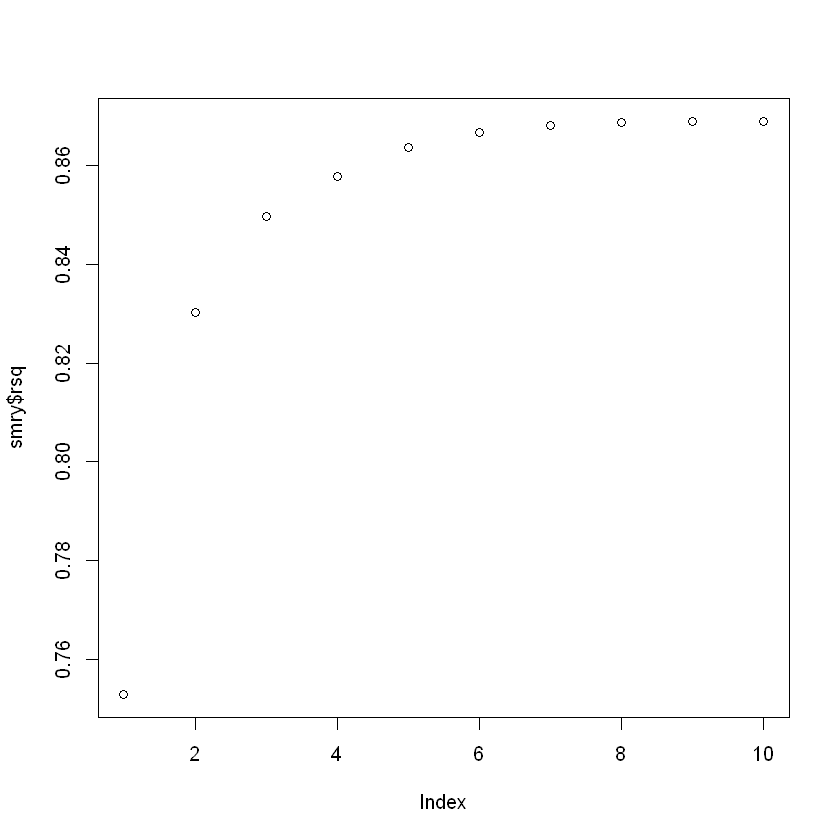

In [17]:
plot(smry$rsq)

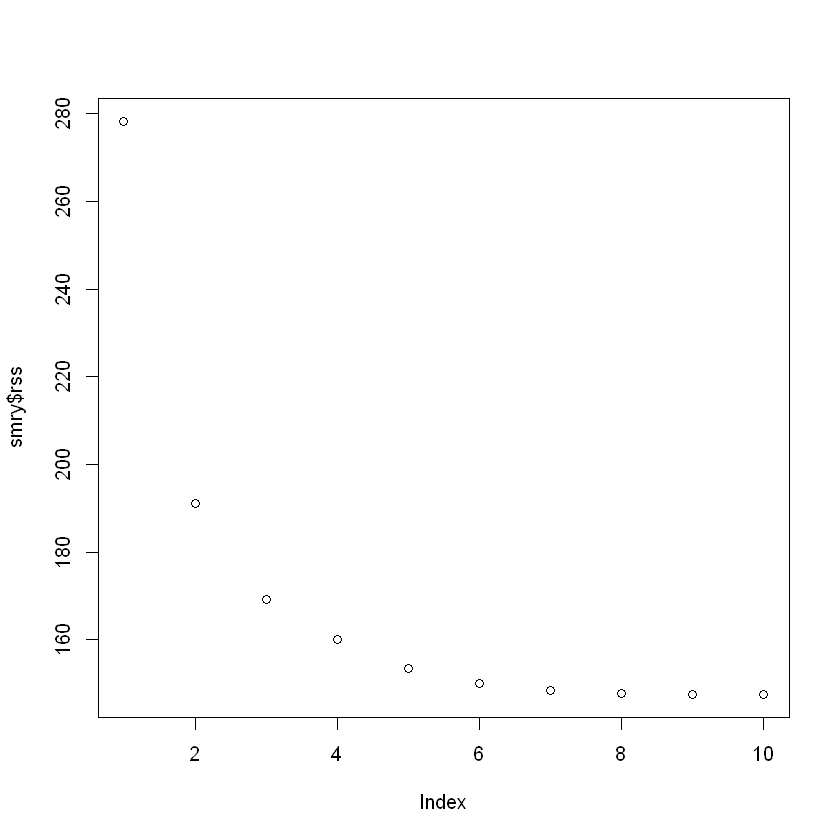

In [18]:
plot(smry$rss)

In [19]:
smry$adjr2

[1] 0.7445939 0.8185189 0.8335561 0.8367919 0.8375334 0.8347177 0.8296261
 [8] 0.8230390 0.8153314 0.8066423

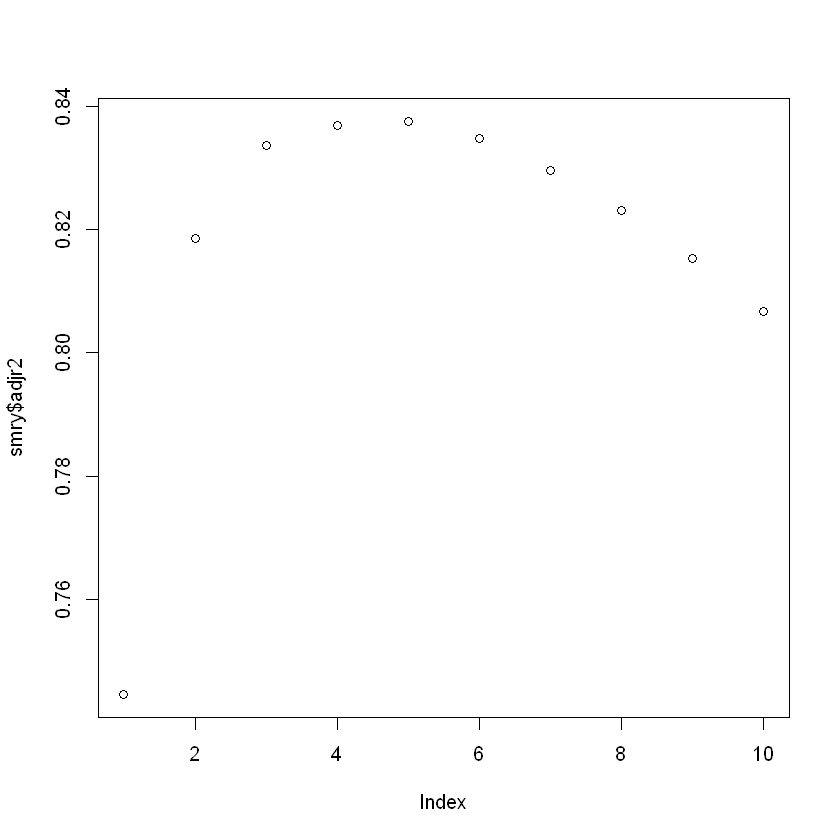

In [20]:
plot(smry$adjr2)

In [21]:
ii = which.max(smry$adjr2)
ii

[1] 5

In [22]:
best_vars = colnames(smry$which)[smry$which[ii,]][-1]
best_vars

[1] "disp" "hp"   "wt"   "qsec" "am"

In [23]:
fmla = paste0("mpg~",paste(best_vars,collapse="+"))
fmla

[1] "mpg~disp+hp+wt+qsec+am"

In [24]:
best_mod = lm(as.formula(fmla),data=mtcars)

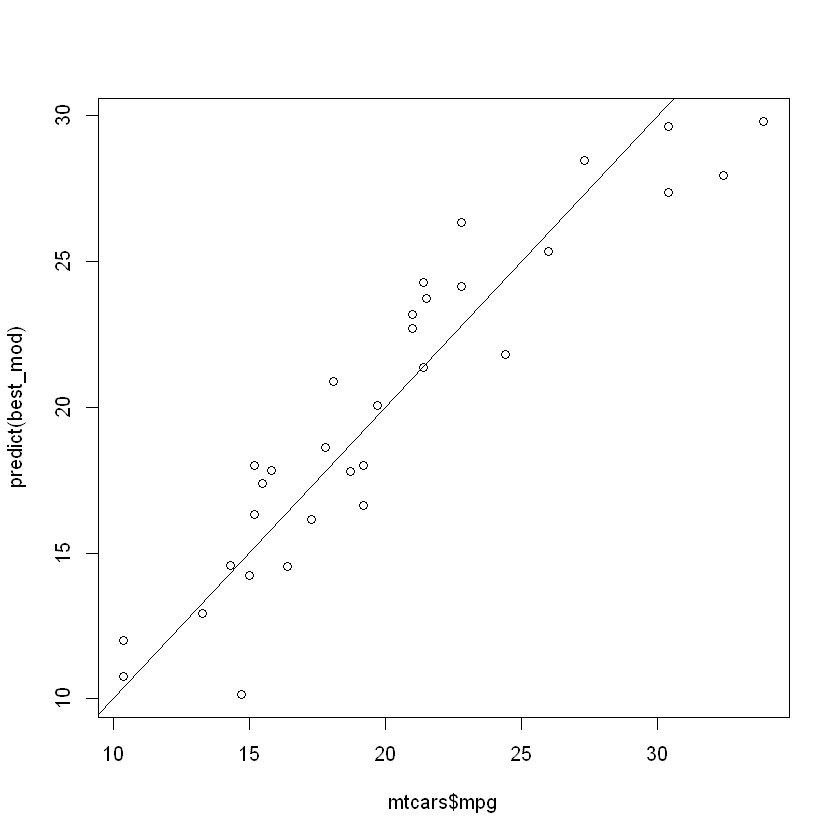

In [25]:
plot(mtcars$mpg,predict(best_mod))
abline(coef=c(0,1))

### Ted Talks Datset

In [26]:
ted = readRDS('data/ted/ted_talks.rds')

In [27]:
dim(ted)

[1] 2550  452

In [28]:
head(ted)

,duration,film_date,num_speaker,published_date,views,wordfreq_children,wordfreq_creativity,wordfreq_culture,wordfreq_dance,wordfreq_education,...,ratingfreq_Longwinded,ratingfreq_Confusing,ratingfreq_Informative,ratingfreq_Fascinating,ratingfreq_Unconvincing,ratingfreq_Persuasive,ratingfreq_Jaw.dropping,ratingfreq_OK,ratingfreq_Obnoxious,ratingfreq_Inspiring
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1164,1140825600,1,1151367060,47227110,1,1,1,1,1,...,0.004123601,0.002578583,0.078273841,0.11274374,0.00319659,0.114054342,0.04729888,0.01250932,0.002226958,0.265572722
2,977,1140825600,1,1151367060,3200520,0,0,1,0,0,...,0.087874659,0.038487738,0.150885559,0.14066757,0.04495913,0.019073569,0.09128065,0.03950954,0.044618529,0.069141689
3,1286,1140739200,1,1151367060,1636292,0,0,0,0,0,...,0.036827195,0.027620397,0.139872521,0.08144476,0.05878187,0.009560907,0.05169972,0.08144476,0.019121813,0.050283286
4,1116,1140912000,1,1151367060,1697550,0,0,0,0,0,...,0.028165236,0.009656652,0.014216738,0.10193133,0.28701717,0.035407725,0.12339056,0.06169528,0.009388412,0.022800429
5,1190,1140566400,1,1151440680,12005869,0,0,0,0,0,...,0.004293521,0.002810304,0.002615144,0.21206089,0.11291959,0.179781421,0.14582358,0.09921936,0.009679938,0.002380952
6,1305,1138838400,1,1151440680,20685401,0,0,1,0,0,...,0.045975514,0.025853087,0.018559521,0.06759573,0.33934618,0.087913519,0.15778849,0.02871842,0.043566033,0.021815577


In [29]:
head(colnames(ted))

[1] "duration"          "film_date"         "num_speaker"      
[4] "published_date"    "views"             "wordfreq_children"

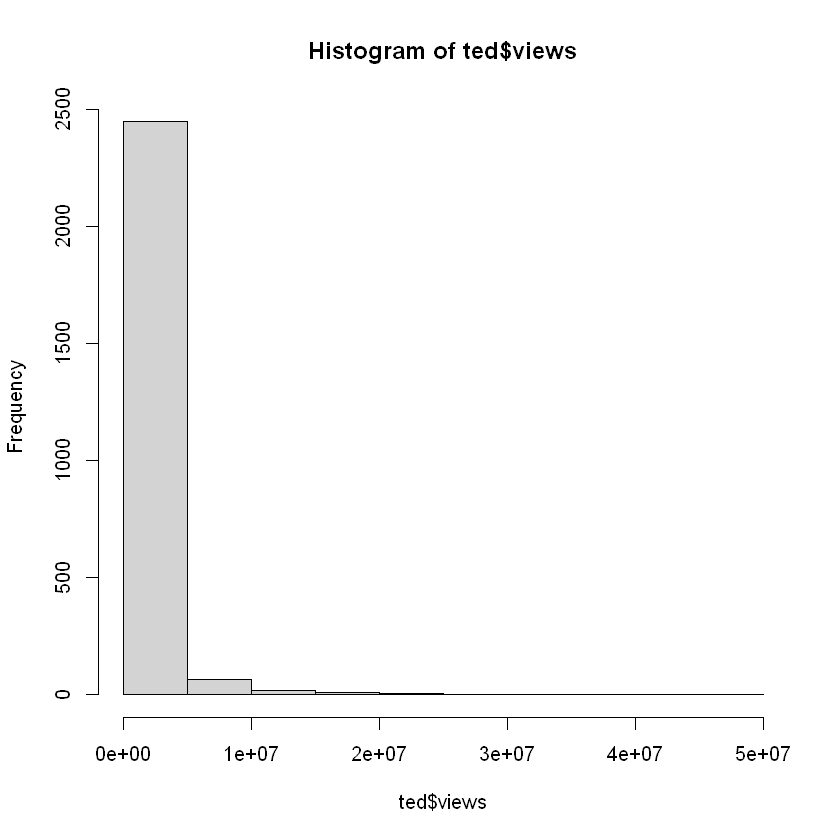

In [30]:
hist(ted$views)

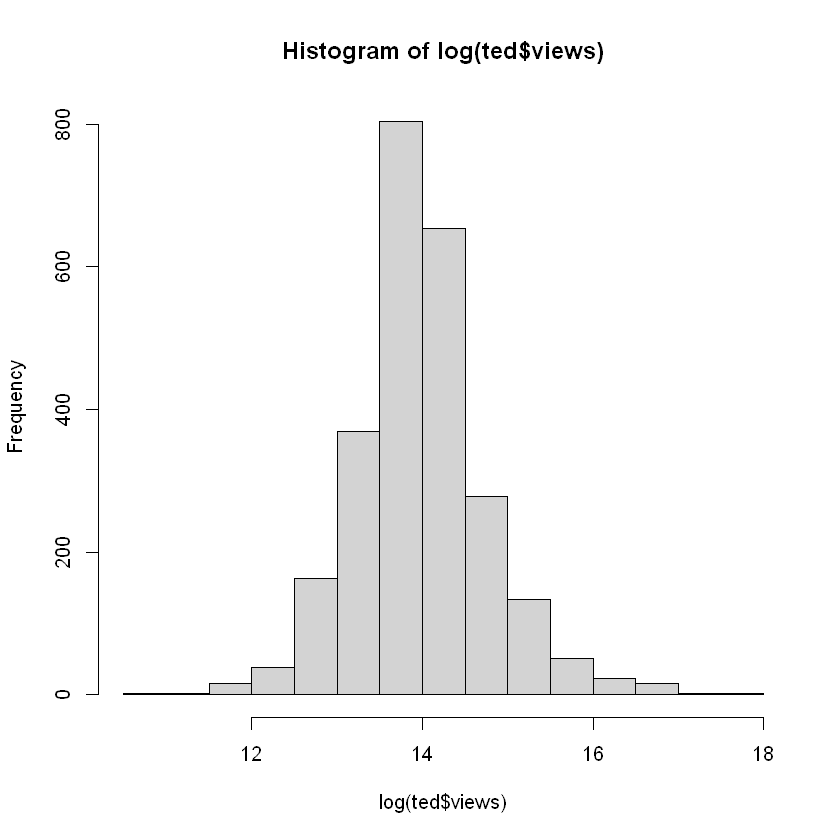

In [31]:
hist(log(ted$views))

In [32]:
tdm = ted[,grep("word",colnames(ted),value=TRUE)]
df = data.frame(views=ted$views,tdm)
df = head(df,n=100)

In [33]:
head(df)

,views,wordfreq_children,wordfreq_creativity,wordfreq_culture,wordfreq_dance,wordfreq_education,wordfreq_parenting,wordfreq_teaching,wordfreq_alternative,wordfreq_cars,...,wordfreq_capitalism,wordfreq_refugees,wordfreq_grammar,wordfreq_discovery,wordfreq_blockchain,wordfreq_tednyc,wordfreq_residency,wordfreq_biosphere,wordfreq_epidemiology,wordfreq_funny
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,47227110,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3200520,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1636292,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1697550,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,12005869,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,20685401,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
dim(df)

[1] 100 434

In [35]:
lm(views~.,data=df)


Call:
lm(formula = views ~ ., data = df)

Coefficients:
              (Intercept)          wordfreq_children  
                 -2178927                  -23288624  
      wordfreq_creativity           wordfreq_culture  
                  3722392                    2475058  
           wordfreq_dance         wordfreq_education  
                 14038882                   24523062  
       wordfreq_parenting          wordfreq_teaching  
                -13738145                   41673411  
     wordfreq_alternative              wordfreq_cars  
                 -2114709                   -4721885  
          wordfreq_change           wordfreq_climate  
                   820363                    6818497  
          wordfreq_energy       wordfreq_environment  
                       NA                    1428897  
          wordfreq_global            wordfreq_issues  
                  8185934                   -8348732  
         wordfreq_science    wordfreq_sustainability  
        

In [36]:
?kappa

kappa {base},R Documentation
"z, x","A matrix or a the result of qr or a fit from a class inheriting from ""lm""."
exact,logical. Should the result be exact?
norm,"character string, specifying the matrix norm with respect to which the condition number is to be computed, see also norm. For rcond, the default is ""O"", meaning the One- or 1-norm. The (currently only) other possible value is ""I"" for the infinity norm."
method,"a partially matched character string specifying the method to be used; ""qr"" is the default for back-compatibility, mainly."
triangular,"logical. If true, the matrix used is just the lower triangular part of z."
LINPACK,"logical. If true and z is not complex, the LINPACK routine dtrco() is called; otherwise the relevant LAPACK routine is."
...,"further arguments passed to or from other methods; for kappa.*(), notably LINPACK when norm is not ""2""."


In [37]:
X = model.matrix(lm(views~.,data=df))
dim(X)

[1] 100 434

In [38]:
xtx = t(X)%*%X
dim(xtx)

[1] 434 434

In [39]:
kappa(xtx)

[1] Inf

In [40]:
solve(xtx)

ERROR: Error in solve.default(xtx): Lapack routine dgesv: system is exactly singular: U[45,45] = 0


In [41]:
ted_mods = regsubsets(log(views)~.,data=df,method="forward",nvmax=100)

Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
"347  linear dependencies found"


Reordering variables and trying again:


Warning message in rval$lopt[] <- rval$vorder[rval$lopt]:
"number of items to replace is not a multiple of replacement length"


In [46]:
ar2 = summary(ted_mods)$adjr2

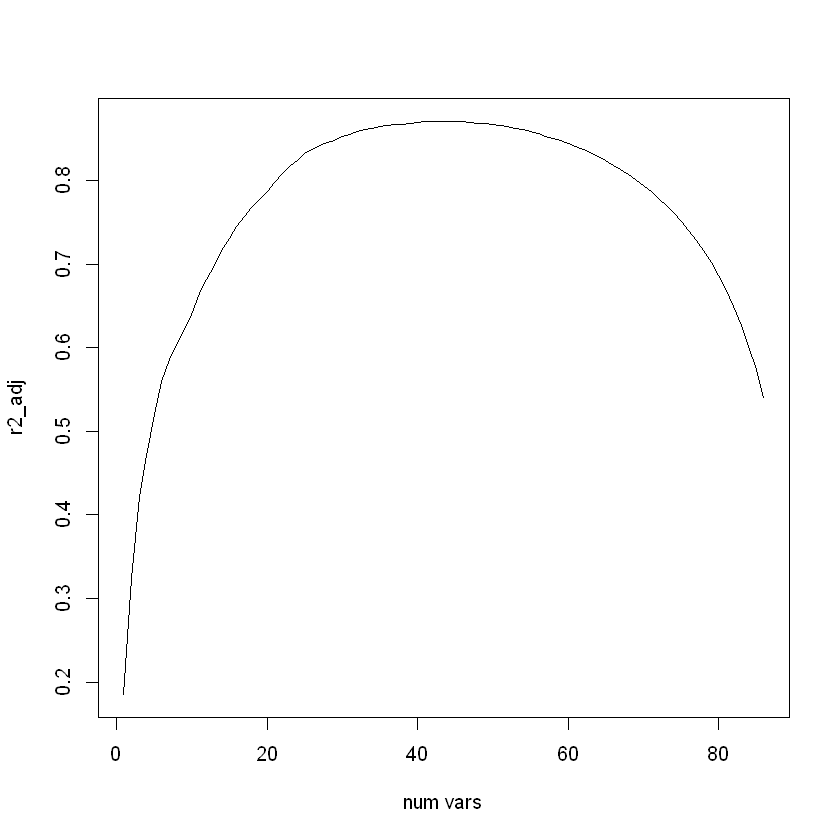

In [47]:
plot(ar2,type='l',ylab='r2_adj',xlab='num vars')

In [48]:
which.max(ar2)

[1] 43

In [49]:
fmla = paste0(colnames(df)[summary(ted_mods)$which[43,]][-1],collapse="+")
fmla = paste0("log(views)~",fmla)
fmla

[1] "log(views)~wordfreq_children+wordfreq_creativity+wordfreq_dance+wordfreq_parenting+wordfreq_teaching+wordfreq_alternative+wordfreq_environment+wordfreq_entertainment+wordfreq_interface+wordfreq_demo+wordfreq_visualizations+wordfreq_goalsetting+wordfreq_psychology+wordfreq_christianity+wordfreq_comedy+wordfreq_religion+wordfreq_storytelling+wordfreq_cognitive+wordfreq_evolution+wordfreq_opensource+wordfreq_movies+wordfreq_prize+wordfreq_violin+wordfreq_and+wordfreq_product+wordfreq_communication+wordfreq_love+wordfreq_marketing+wordfreq_aging+wordfreq_care+wordfreq_microfinance+wordfreq_poverty+wordfreq_aircraft+wordfreq_sports+wordfreq_medicine+wordfreq_evolutionary+wordfreq_materials+wordfreq_ants+wordfreq_primates+wordfreq_singer+wordfreq_fish+wordfreq_composing+wordfreq_natural"

In [50]:
best_mod = lm(fmla,data=df)

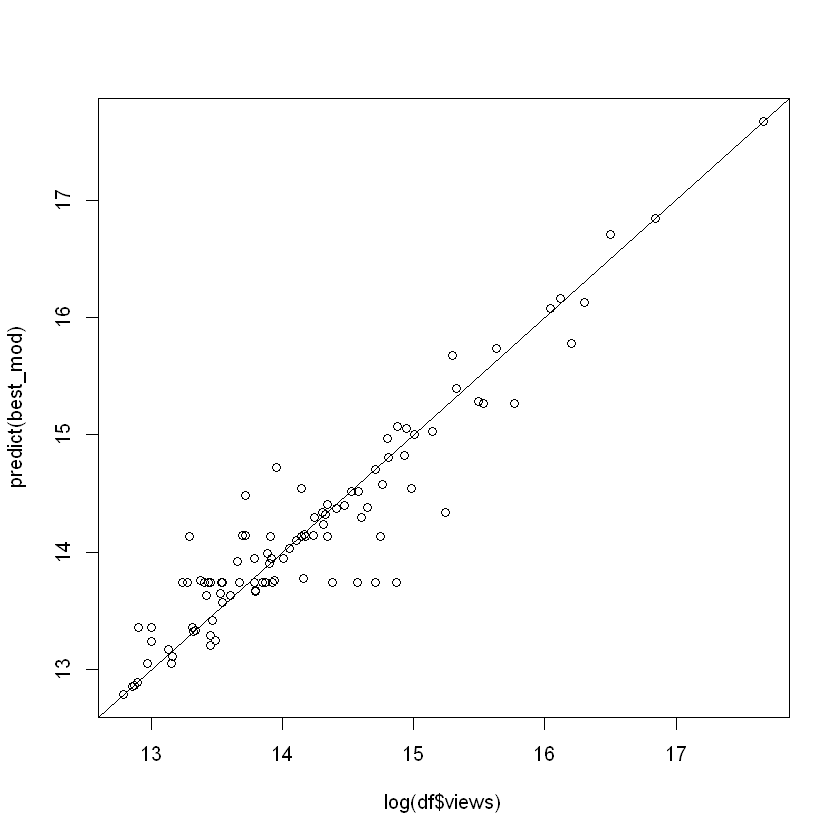

In [52]:
plot(log(df$views),predict(best_mod))
abline(coef=c(0,1))